# Konvoluutioneuroverkon treenaaminen CIFAR-10 datasetillä

In [81]:
import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

In [82]:
from keras import backend as K
print(K.backend())

tensorflow


## Datan esikäsittely
Kuvat ovat 32x32 pikseliä ja 3 kanavaa (RGB). Kuvat on normalisoitu skaalalla 0-1.
Testi- ja validointidatan erottelu on tehty valmiiksi.
Vastemuuttuja on muutettu one-hot-enkoodattuun muotoon käyttämällä keras.utils.to_categorical-funktiota. Tämä muuttaa alkuperäiset kokonaislukuarvot, jotka edustavat luokkia (0–9), binääriseksi vektoriksi.

In [83]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)  # Change to 3 channels for RGB
kernel_size = (3,3)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# No need to expand dimensions as CIFAR-10 is already in (32, 32, 3) format
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Mallin rakennus
Mallissa käytetään konvoluutiokerroksia, jotka sisältävät ReLU-aktivaatioita, Batch Normalization -kerroksia ja MaxPooling-kerroksia, jotka vähentävät ulottuvuuksia. Dropout-kerroksia on lisätty estämään yliopetusta. Lopuksi, malli käyttää tiheää kerrosta ja softmax-aktivointia ennusteiden tekemiseen.

In [84]:
inputs = keras.Input(shape=input_shape)

x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = layers.BatchNormalization()(x)  
x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)  

x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)  
x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)  

x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)  
x = layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)  

x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.25)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)


In [85]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 128)            │             

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

## Mallin kouluttaminen
Malli koulutetaan 15 epookilla ja eräkoko on 256.

In [86]:
batch_size = 256
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.2988 - loss: 2.1126 - val_accuracy: 0.0971 - val_loss: 3.3703
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5162 - loss: 1.3398 - val_accuracy: 0.1397 - val_loss: 3.9589
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6088 - loss: 1.1105 - val_accuracy: 0.5012 - val_loss: 1.4315
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6682 - loss: 0.9428 - val_accuracy: 0.6964 - val_loss: 0.8582
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7027 - loss: 0.8441 - val_accuracy: 0.7263 - val_loss: 0.7792
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7384 - loss: 0.7567 - val_accuracy: 0.7512 - val_loss: 0.7091
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7551 - loss: 0.7037 - val_accuracy: 0.7383 - val_loss: 0.7610
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7707 - loss: 0.6554 - val_acc

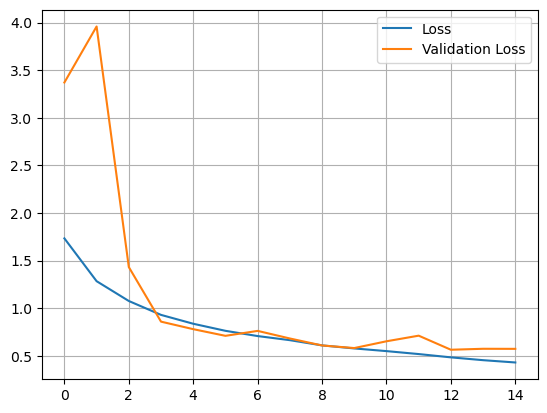

In [87]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.grid()
plt.show()

# Mallin arviointi
Testin loss on noin **0.60**
Testitarkkuus on noin 80%

In [88]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.6011702418327332
Test accuracy: 0.800599992275238


## Visuaalisten tulosten tulkinta
Pylväsdiagrammi näyttää, kuinka todennäköisesti malli uskoo kuvan kuuluvan jokaiseen kategoriaan.
0 = Airplane
1 = Automobile
2 = Bird
3 = Cat
4 = Deer
5 = Dog
6 = Frog
7 = Horse
8 = Ship
9 = Truck

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


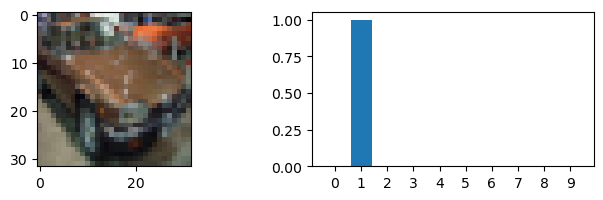

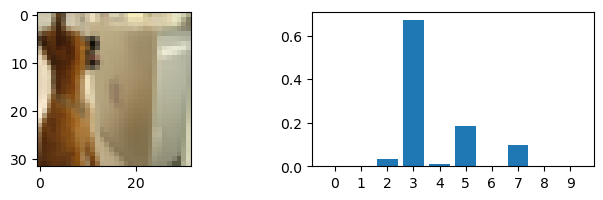

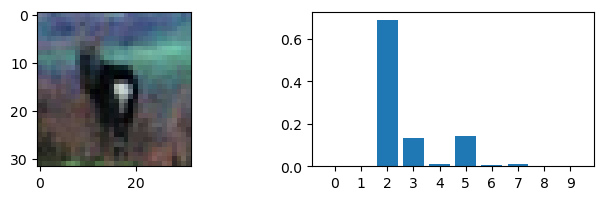

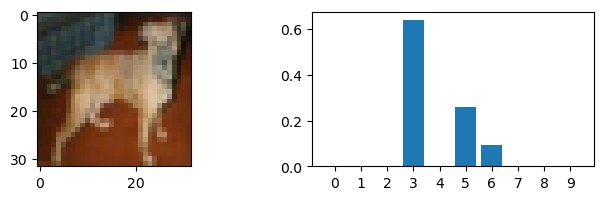

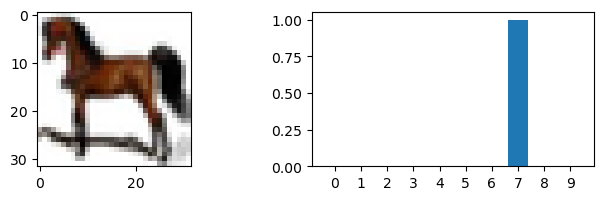

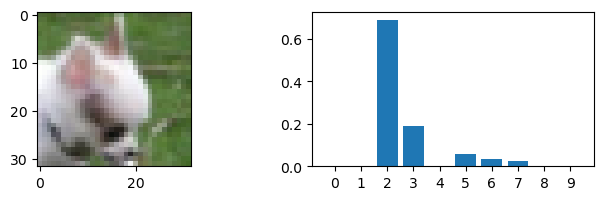

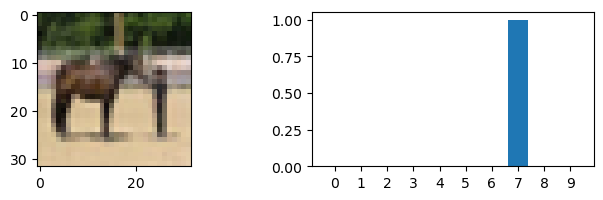

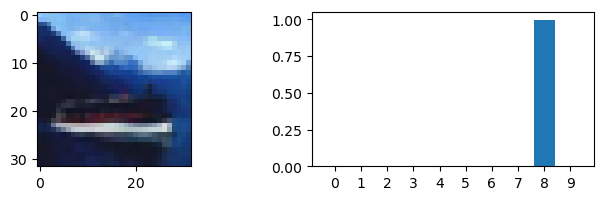

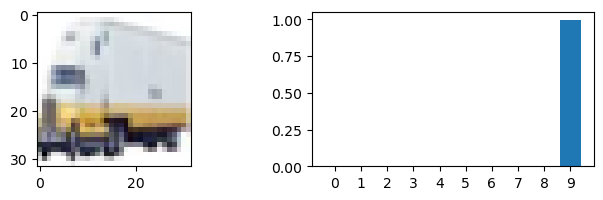

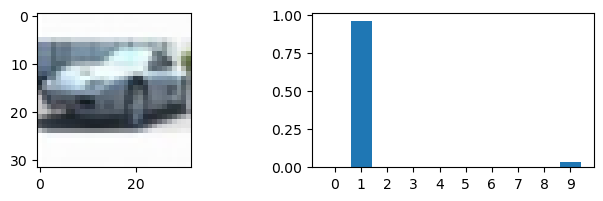

In [89]:
x = x_test
# Käytetään predict()-metodia, jotta voidaan määrittää batch-size, muuten GPU:n muisti loppuu kesken
y = model.predict(x, batch_size=32)
start = 2000

for k in range(10):
    plt.figure(figsize=(8, 2))
    plt.subplot(1,2,1)
    plt.imshow(x[start+k].reshape((32, 32, 3)), cmap='gray')
    ind = np.arange(0, 10)
    plt.subplot(1,2,2)
    plt.bar(ind, y[start+k].flatten())
    plt.xticks(range(10))